In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os
from google.colab import drive
drive.mount('/content/drive')

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'academic/graduate/courses/1. fall 2023/cs760/hw5/'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)

from numpy import genfromtxt
data_2d = genfromtxt(GOOGLE_DRIVE_PATH + "/data2D.csv", delimiter=',')
data_1000d = genfromtxt(GOOGLE_DRIVE_PATH + "/data1000D.csv", delimiter=',')

Mounted at /content/drive


# Buggy PCA

In [32]:
# BUGGY PCA

# note: each ROW of x is a datapoint
# each column is a feature
def buggy_PCA(X, d):
  print(X)
  rows, _ = np.array(X.shape)
  U, s, VT = np.linalg.svd(X, full_matrices=True)
  s = s[:d]
  S_matrix = np.zeros_like(X)
  np.fill_diagonal(S_matrix, s)
  _, cols = S_matrix.shape
  sigma_fixed = np.concatenate((S_matrix[:,:d], np.zeros((rows, cols - d))), axis=1)

  projections = U @ sigma_fixed
  reconstruction = U @ sigma_fixed @ VT
  params = None

  return projections[:, :d], params, reconstruction

In [33]:
projections, params, reconstruction = buggy_PCA(data_2d, 1)

[[ 1.75400247 -0.48022658]
 [-1.74377166  0.19643971]
 [-0.87925635  0.18178834]
 [ 1.994941   -0.7255223 ]
 [ 0.6044484  -0.446574  ]
 [-0.17470219 -0.06112778]
 [-0.27087567 -0.24782435]
 [-1.11720993 -0.15983681]
 [ 0.46643572 -0.27093142]
 [-0.62931067  0.07465184]
 [ 1.11196832 -0.5170445 ]
 [-1.38308818  0.09811543]
 [ 0.39494326 -0.34738615]
 [ 1.41567507 -0.45279458]
 [-0.47668928 -0.04243003]
 [ 0.87028141 -0.25373944]
 [ 0.25252717 -0.18001171]
 [-0.29063884  0.04460214]
 [-0.14692382 -0.26685982]
 [ 1.63463772 -0.61335138]
 [ 0.36812794 -0.04298636]
 [ 1.21471432 -0.37361411]
 [ 0.9900057  -0.54226787]
 [ 0.64526156 -0.47465393]
 [ 2.52063644 -0.77157308]
 [-2.1614142   0.30985448]
 [-1.75607482  0.18533606]
 [-1.23741067  0.19168606]
 [ 1.56789706 -0.51505109]
 [ 0.57138193 -0.28074248]
 [ 0.18496749 -0.18667207]
 [-0.7951597  -0.08860398]
 [-1.05166499  0.07786091]
 [ 0.22840512 -0.35873651]
 [-0.28222018 -0.41492208]
 [ 0.77952245 -0.58671522]
 [ 3.17221012 -1.00098382]
 

In [34]:
# centered_data_2d = data_2d - np.mean(data_2d)

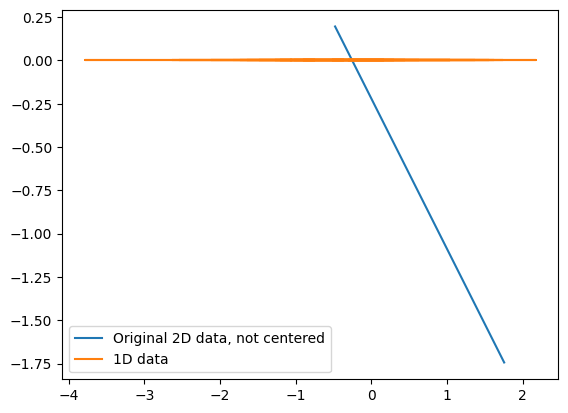

In [35]:
plt.plot(data_2d[0], data_2d[1], label = "Original 2D data, not centered")
plt.plot(projections, np.zeros_like(projections), label = "1D data")
plt.legend()
plt.show()

# Demeaned PCA

In [56]:
# DEMEANED PCA

# note: each ROW of x is a datapoint
# each column is a feature
def demeaned_PCA(X, d):
  # print(X)
  # print(np.mean(X, axis = 0))
  # X -= np.mean(X, axis=(0, 1))
  X -= np.mean(X, axis = 0)
  # print(X)
  rows, _ = np.array(X.shape)
  U, s, VT = np.linalg.svd(X, full_matrices=True)
  s = s[:d]
  S_matrix = np.zeros_like(X)
  np.fill_diagonal(S_matrix, s)
  _, cols = S_matrix.shape
  sigma_fixed = np.concatenate((S_matrix[:,:d], np.zeros((rows, cols - d))), axis=1)

  projections = U @ sigma_fixed
  reconstruction = U @ sigma_fixed @ VT
  params = None

  return projections[:, :d], params, reconstruction

In [57]:
data_2d.shape

(50, 2)

In [58]:
projections, params, reconstruction = demeaned_PCA(data_2d, 1)

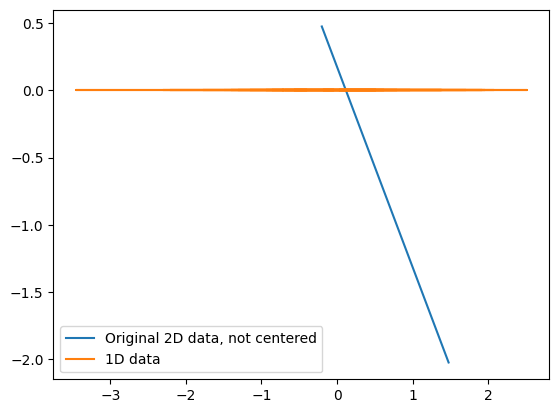

In [59]:
plt.plot(data_2d[0], data_2d[1], label = "Original 2D data, not centered")
plt.plot(projections, np.zeros_like(projections), label = "1D data")
plt.legend()
plt.show()

# Normalized PCA

In [60]:
# NORMALIZED PCA

# note: each ROW of x is a datapoint
# each column is a feature
def normalized_PCA(X, d):
  # print(X)
  # print(np.mean(X))
  X -= np.mean(X, axis = 0)
  X /= np.std(X, axis = 0)
  # print(X)
  rows, _ = np.array(X.shape)
  U, s, VT = np.linalg.svd(X, full_matrices=True)
  s = s[:d]
  S_matrix = np.zeros_like(X)
  np.fill_diagonal(S_matrix, s)
  _, cols = S_matrix.shape
  sigma_fixed = np.concatenate((S_matrix[:,:d], np.zeros((rows, cols - d))), axis=1)

  projections = U @ sigma_fixed
  reconstruction = U @ sigma_fixed @ VT
  params = None

  return projections[:, :d], params, reconstruction

In [61]:
data_2d.shape

(50, 2)

In [62]:
projections, params, reconstruction = normalized_PCA(data_2d, 1)

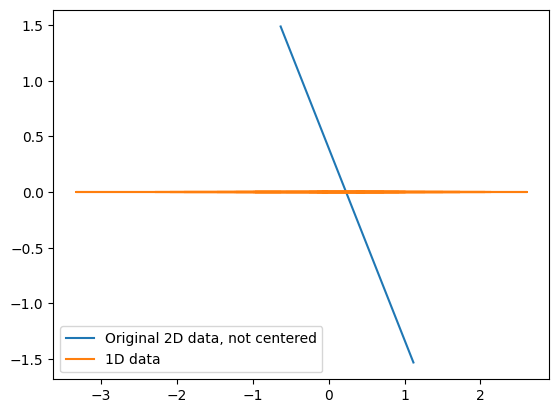

In [63]:
plt.plot(data_2d[0], data_2d[1], label = "Original 2D data, not centered")
plt.plot(projections, np.zeros_like(projections), label = "1D data")
plt.legend()
plt.show()